In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("sma_ques9_dataset.csv", parse_dates=["date"])
df.head(5)

,date,platform,competitor,post_type,likes,comments,shares,sentiment
0,2025-04-01,Twitter,TechAble,text,120,15,10,positive
1,2025-04-02,Instagram,Accessify,image,340,34,45,positive
2,2025-04-03,Facebook,TechAble,video,220,25,30,neutral
3,2025-04-03,Twitter,EnableNow,text,90,8,5,negative
4,2025-04-04,Instagram,Accessify,video,430,50,60,positive


In [13]:
# Basic summary
print("Summary by Competitor:")
print(df.groupby("competitor")[["likes", "comments", "shares"]].mean())

Summary by Competitor:
                 likes   comments     shares
competitor                                  
Accessify   365.714286  40.571429  46.571429
EnableNow   150.000000  16.666667  14.000000
TechAble    168.571429  18.571429  20.428571


In [5]:
# Count of posts per platform per competitor
platform_dist = df.groupby(["competitor", "platform"]).size().unstack()
print("\nPosts by Platform:")
print(platform_dist)


Posts by Platform:
platform    Facebook  Instagram  Twitter
competitor                              
Accessify        1.0        5.0      1.0
EnableNow        2.0        2.0      2.0
TechAble         3.0        NaN      4.0


In [7]:
# Sentiment distribution
sentiment_dist = df.groupby(["competitor", "sentiment"]).size().unstack(fill_value=0)
print("\nSentiment Distribution:")
print(sentiment_dist)


Sentiment Distribution:
sentiment   negative  neutral  positive
competitor                             
Accessify          0        2         5
EnableNow          3        2         1
TechAble           0        3         4


C:\Users\karke\AppData\Local\Temp\ipykernel_29848\2253739292.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="competitor", y="likes", estimator='mean', ci=None)


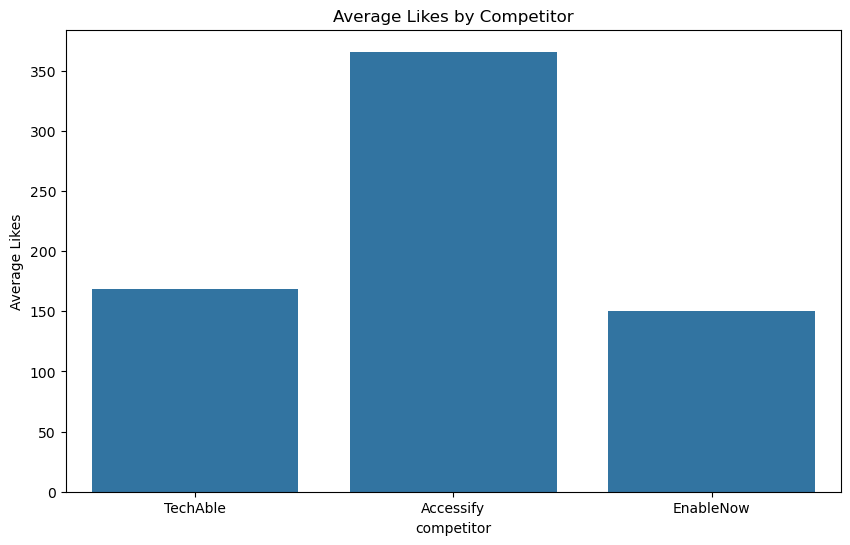

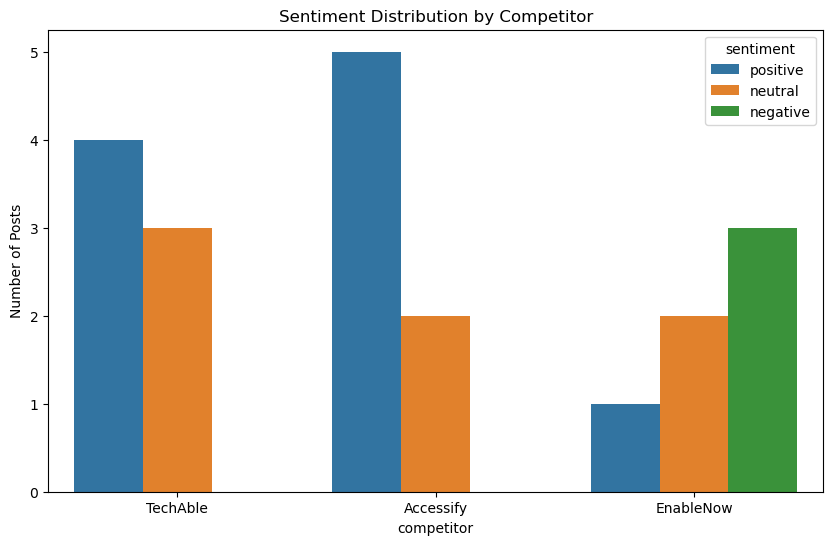

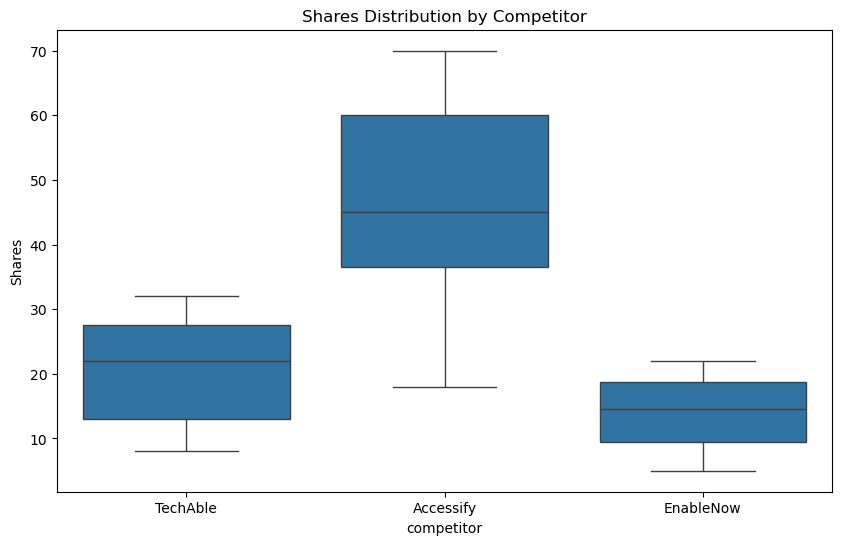

In [9]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="competitor", y="likes", estimator='mean', ci=None)
plt.title("Average Likes by Competitor")
plt.ylabel("Average Likes")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="competitor", hue="sentiment")
plt.title("Sentiment Distribution by Competitor")
plt.ylabel("Number of Posts")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="competitor", y="shares")
plt.title("Shares Distribution by Competitor")
plt.ylabel("Shares")
plt.show()
